## Исследование данных о российском кинопрокате



### Описание проекта
Заказчик этого исследования — Министерство культуры Российской Федерации.
Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю.
Вы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

In [1]:
import warnings

warnings.filterwarnings("ignore")

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [2]:
import pandas as pd

In [3]:
try:
    df_1 = pd.read_csv('/datasets/mkrf_movies.csv')
    df_2 = pd.read_csv('/datasets/mkrf_shows.csv')
except:
    df_1 = pd.read_csv('../datasets/mkrf_movies.csv')
    df_2 = pd.read_csv('../datasets/mkrf_shows.csv')

#### 1.1. Посмотрим Датасеты

In [4]:
df_1.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [5]:
pd.options.display.float_format = '{:,.2f}'.format
df_2.head()

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


#### 1.2. Общая информация о Датасетах

In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

**Описание столбцов**
title — название фильма;
puNumber — номер прокатного удостоверения;
show_start_date — дата премьеры фильма;
type — тип фильма;
film_studio — студия-производитель;
production_country — страна-производитель;
director — режиссёр;
producer — продюсер;
age_restriction — возрастная категория;
refundable_support — объём возвратных средств государственной поддержки;
nonrefundable_support — объём невозвратных средств государственной поддержки;
financing_source — источник государственного финансирования;
budget — общий бюджет фильма;
ratings — рейтинг фильма на КиноПоиске;
genres — жанр фильма.

**Есть пропуски**
director
producer
refundable_support
nonrefundable_support
budget
financing_source
ratings
genres

In [7]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


**Описание столбцов**
puNumber — номер прокатного удостоверения;
box_office — сборы в рублях.

**Просусков в данных нет**

#### 1.3. Будем склеивать датасеты по столбцу puNumber
Для этого приведем их к одному типу данных

In [8]:
df_1.puNumber.value_counts()

221054410    2
221154310    2
221048915    1
121004611    1
121014411    1
            ..
121009015    1
111004115    1
211047015    1
121011015    1
124010719    1
Name: puNumber, Length: 7484, dtype: int64

In [9]:
df_1 = df_1.loc[df_1.puNumber != 'нет']

In [10]:
df_1.puNumber = df_1.puNumber.astype('uint64')
df_2.puNumber = df_2.puNumber.astype('uint64')

In [11]:
df = df_1.merge(df_2, how='outer', left_on='puNumber', right_on='puNumber')
df.sample(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4752,"С глаз - долой, из чарта - вон!",221174910,2010-12-31T12:00:00.000Z,Художественный,"Касл Рок Интертейнмент, Виллидж Роадшоу Пикчер...",США,Марк Лоренс,"Лиз Глотзер, Мартин Шафер",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"мелодрама,комедия,музыка",NaN
1563,ПУТЕВКА В ЖИЗНЬ.,111003414,2014-03-28T12:00:00.000Z,Художественный,"АНО ""Творческая студия ""Стелла""",Россия,О.Галин,Ф.Попов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.6,драма,"136,340.00"
5626,Максимальный удар,121026117,2017-11-30T12:00:00.000Z,Художественный,"Голливуд Шторм, Царь Пикчерз",США - Россия,Анджей Бартковяк,"Анджей Бартковяк, Александр Изотов, Александр ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,3.3,"боевик,комедия","1,614,105.00"
5426,Проклятие Аннабель: Зарождение зла,121015017,2017-08-10T12:00:00.000Z,Художественный,"Атомик Монстр, Нью Лайн Синема, Атлас Интертей...",США,Дэвид Ф. Сандберг,"Джеймс Ван, Питер Сафран",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.2,"ужасы,триллер,детектив","335,137,159.00"
6955,Ядовитая роза,121013619,2019-05-23T12:00:00.000Z,Художественный,Миллениум Медиа,США - Италия,"Джордж Галло, Франческо Синкуемани","Оскар Генерале, Джефф Эллиотт",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,5.2,триллер,"8,523,922.50"


In [12]:
df = df.loc[df.production_country != '2019']

### Шаг 2. Предобработка данных

Посмотрим на распределение данных

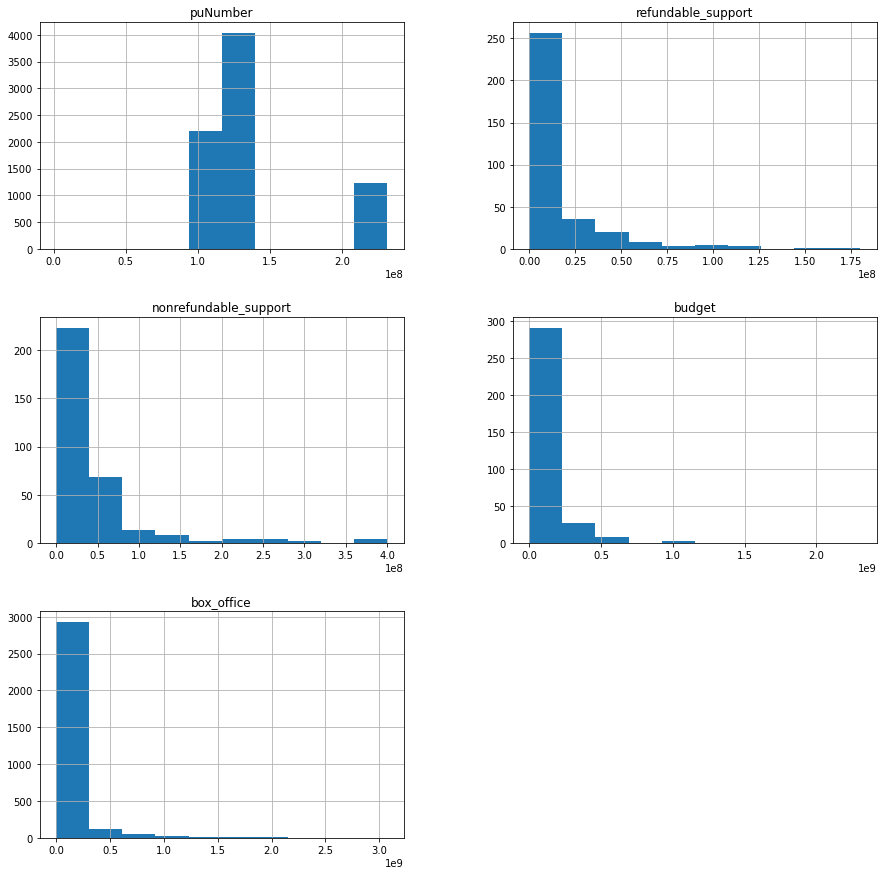

In [13]:
df.hist(figsize=(15, 15))
None

Распредение **Пуассона** имеют:
1. rufundable_support
2. nonrufundable_support
3. budget
4. box_office

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7484 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7484 non-null   object 
 1   puNumber               7484 non-null   uint64 
 2   show_start_date        7484 non-null   object 
 3   type                   7484 non-null   object 
 4   film_studio            7466 non-null   object 
 5   production_country     7482 non-null   object 
 6   director               7475 non-null   object 
 7   producer               6916 non-null   object 
 8   age_restriction        7484 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6518 non-null   object 
 14  genres                 6509 non-null   object 
 15  box_

Перед изменением типа данных на категориальный у следующих столбцов заполним пропуски

In [15]:
df.financing_source = df.financing_source.fillna('unknown')
df.genres = df.genres.fillna('unknown')
df.producer = df.producer.fillna('unknown')
df.film_studio = df.film_studio.fillna('unknown')
df.director = df.director.fillna('unknown')
df.production_country = df.production_country.fillna('unknown')

Обработка столбцов со строковым типом данных

In [16]:
df.type.value_counts()

Художественный                4519
 Художественный               1388
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64

In [17]:
columns = df.select_dtypes(include='object').columns
columns

Index(['title', 'show_start_date', 'type', 'film_studio', 'production_country',
       'director', 'producer', 'age_restriction', 'financing_source',
       'ratings', 'genres'],
      dtype='object')

Обработка столбца production_country

In [18]:
df.production_country.value_counts()

США                                                                    2172
Россия                                                                 1820
СССР                                                                    347
Франция                                                                 301
Великобритания                                                          257
                                                                       ... 
Франция - Германия - Турция - Катар                                       1
Франция-Китай                                                             1
Россия, Германия, Великобритания                                          1
Великобритания - Италия - Испания                                         1
Дания - Канада - Швеция - Франция - Германия - Великобритания - США       1
Name: production_country, Length: 950, dtype: int64

Мы видим засоренные данные, почистим, приведем к массиву

In [19]:
df['country'] = df.production_country
df.country = df.country.str.replace(', ', '$', regex=True)
df.country = df.country.str.replace(' ,', '$', regex=True)
df.country = df.country.str.replace(',', '$', regex=True)
df.country = df.country.str.replace(' -', '$', regex=True)
df.country = df.country.str.replace('- ', '$', regex=True)
df.country = df.country.str.replace('-', '$', regex=True)
df.country = df.country.str.replace(' и ', '$', regex=True)

df.country = df.country.str.replace('Китай', 'КНР', regex=True)
df.country = df.country.str.replace(' ', '', regex=True)

df.country = df.country.str.replace('С', 'С', regex=True)
df.country = df.country.str.replace('Р', 'P', regex=True)
df.country = df.country.str.replace('Pеспублика', '', regex=True)
df.country = df.country.str.replace('Южная', '', regex=True)

df.country = df.country.str.replace('CША', 'США', regex=True)
df.country = df.country.str.replace('Сша', 'США', regex=True)
df.country = df.country.str.replace('СЩА', 'США', regex=True)

new_df = df.country.str.split('$', expand=True)

df.country = new_df[0]

Уберем лишнии пробелы

In [20]:
columns = ['title', 'type', 'film_studio', 'director', 'producer', 'genres',
           'financing_source', 'production_country', 'country']
for column in columns:
    df[column] = df[column].str.strip()

Выделим столбцы имеющие строковый тип данных (object)

In [21]:
gl_obj = df.select_dtypes(include='object').copy()
gl_obj.describe()

,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,financing_source,ratings,genres,country
count,7484,7484,7484,7484,7484,7484,7484,7484,7484,6518,7484,7484
unique,6770,1964,6,5462,934,4801,5334,5,4,94,743,78
top,День святого Валентина_,2010-12-17T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",США,О.Семёнова,unknown,«16+» - для детей старше 16 лет,unknown,6.6,unknown,США
freq,5,96,5907,345,2175,60,568,2850,7152,312,975,2756


<div class="alert alert-info">

**Комментарий студента**
    
1. Мы видим что названия фильмов не уникальны. тоесть есть неявные дубликаты а так же разыне фильмы но с одинаковым названием, обработка неявных дубликатов будет ниже
2. Пояснение по колонкам которые мы переводим в числовой / временной / категориальный формат будут ниже
3. Хочу обратить внимание на столбцы в которых данные перечисляются через запятую, такая связь называется m2m и является неудобной для обработки, в этом отчете я оставлял только 1 элемент подобного столбца.

##### 2.1.1. В категориальный тип


**Будем переводить**
1. type
2. financing_source
3. genres
4. age_restriction

In [22]:
columns = ['type', 'financing_source', 'genres', 'age_restriction']
for column in columns:
    dow = gl_obj[column]
    dow_cat = dow.astype('category')
    df[column] = dow_cat
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7484 entries, 0 to 7484
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   title                  7484 non-null   object  
 1   puNumber               7484 non-null   uint64  
 2   show_start_date        7484 non-null   object  
 3   type                   7484 non-null   category
 4   film_studio            7484 non-null   object  
 5   production_country     7484 non-null   object  
 6   director               7484 non-null   object  
 7   producer               7484 non-null   object  
 8   age_restriction        7484 non-null   category
 9   refundable_support     332 non-null    float64 
 10  nonrefundable_support  332 non-null    float64 
 11  budget                 332 non-null    float64 
 12  financing_source       7484 non-null   category
 13  ratings                6518 non-null   object  
 14  genres                 7484 non-null   c

##### 2.1.2. В datetime

In [23]:
df.show_start_date = pd.to_datetime(df.show_start_date)

##### 2.1.3. В числа

In [24]:
df.ratings.value_counts()

6.6    312
6.7    308
6.8    261
7.2    252
6.2    243
      ... 
19%      1
90%      1
62%      1
64%      1
9.1      1
Name: ratings, Length: 94, dtype: int64

In [25]:
cond: bool = (df.ratings.str.find('%') != -1) & (df.ratings.isna() == False)
print('cout rows with % =', df.loc[cond, 'ratings'].shape[0])
print('% =', round(df.loc[cond, 'ratings'].shape[0] / df.shape[0] * 100, 2))

cout rows with % = 29
% = 0.39


In [26]:
df.loc[cond, 'ratings'] = df.loc[cond, 'ratings'].str.slice(0, -1).astype('uint8') / 10

df.ratings.value_counts()

6.6    312
6.7    308
6.8    261
7.2    252
6.2    243
      ... 
1.9      1
9.0      1
6.2      1
6.4      1
9.1      1
Name: ratings, Length: 94, dtype: int64

<div class="alert alert-info">

**Комментарий студента**
    
Фильмов с % рэйтингом 29 штук, что сотавляет 0.39% от общего числа фильмов, уверен что можно отбросить эти фильмы. Но я все такие исправлю рэйтинг и перевиду его в 10 бальную шкалу

In [27]:
df.ratings = df.ratings.astype('float16')

##### 2.1.4. Проверка

In [28]:
df.select_dtypes(include='object').sample(5)

,title,film_studio,production_country,director,producer,country
7333,Эткер,"БУ ""ГОСКИНОСТУДИЯ ""ЧУВАШКИНО"" И АРХИВ ЭЛЕКТРОН...",Россия,А.Митёшин,Е.Митешина,Pоссия
1478,Возмездие._,"Арчер Стрит Продакшнз, Лэтитъюд Медиа, Лайонсг...",Австралия-Великобритания,Джонатан Теплицки,"Крис Браун, Билл Кёрбишли, Энди Пэтерсон",Австралия
1314,"Двойник /По повести Ф.М.Достоевского ""Двойник....","Алков Интертейнмент, Аттеркоп Продакшнз, Брити...",Великобритания,Ричард Айоади,"Амина Дасмал, Майкл Кейн, Робин Фокс",Великобритания
4747,Гадкий Я,"Иллюминейшн Интертейнмент, Юниверсал Пикчерз",США,"Пьер Коффин, Крис Рено","Джон Коэн, Кристофер Милидандри",США
1939,МАМЫ 3,"ООО ""ЕМ Продакшн""",Россия,"Г.Малков, Э.Никогосян","В.Поляков, Г.Малков",Pоссия


Колонки title, film_studio, director, producer оставим типа object, тк для эффективности перехода к категориальному типу данных, необходимо менее 50% уникальных значений

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [29]:
_ = df.isna().sum()
_.loc[_ != 0]

refundable_support       7152
nonrefundable_support    7152
budget                   7152
ratings                   966
box_office               4326
dtype: int64

In [30]:
_ = df.loc[(df.refundable_support == 0) | (df.nonrefundable_support == 0)].sample(5)

In [31]:
_.shape[0]

5

230 фильмов имеют нулевое финансирование

Заполним пропуски (государственное финансирование) у фильмов, ~~нулями~~ (-1) потому что, постоянно помнить о том, что 0 - это отсутствие госфинансирования, а не нулевое финансирование. К тому же следовало бы провести проверку, возможно нулевые значения в этих колонках уже есть. Соответственно при фильтрации в будущем мы потеряем данные, с реальными нулями. Лучше заполнять невозможным значением, например -1.

In [32]:
df.refundable_support = df.refundable_support.fillna(-1)
df.nonrefundable_support = df.nonrefundable_support.fillna(-1)

df.refundable_support = df.refundable_support.astype('int64')
df.nonrefundable_support = df.nonrefundable_support.astype('int64')

In [33]:
_ = df.isna().sum()
_.loc[_ != 0]

budget        7152
ratings        966
box_office    4326
dtype: int64

In [34]:
_ = df.loc[df.ratings.isna() == True]
_.sample(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,country
6304,Последние шесть дней,111019718,2018-11-01 12:00:00+00:00,Художественный,"ООО ""Джей Си Эл Медиа""",Россия,И.Корнеев,Ю.Смирнов,«16+» - для детей старше 16 лет,-1,-1,NaN,unknown,NaN,unknown,NaN,Pоссия
6696,"Я - Айвазовский, родом из Крыма",112002619,2019-03-01 12:00:00+00:00,Документальный,"ООО Продюсерский центр ""4 формата""",Россия,А.Джазоян,А.Джазоян,«0+» - для любой зрительской аудитории,-1,-1,NaN,unknown,NaN,unknown,NaN,Pоссия
2074,LIAF-2014. Программа Лондонского международног...,124000215,2015-01-27 12:00:00+00:00,Анимационный,"Свис Рэдио и Телевижн, Бенни Бокс, Сакреблё Пр...",Япония - Великобритания - Швейцария - Ирландия...,"Даэ Джонг, Томек Дуки, Поль Кабон, Нино Кристе...","Павел Бинчуки, Эвелина и Эугениуш Горджежик, Р...",«16+» - для детей старше 16 лет,-1,-1,NaN,unknown,NaN,unknown,NaN,Япония
7001,"Машины песенки. Серия ""Последний писк моды""",124004319,2019-06-15 12:00:00+00:00,Анимационный,"Анимаккорд Лтд, ООО Студия ""Анимаккорд""",Республика Кипр - Россия,"Ринат Газизов, Илья Трусов",Дмитрий Ловейко,«0+» - для любой зрительской аудитории,-1,-1,NaN,unknown,NaN,unknown,NaN,Кипр
1532,БИРМИНГЕМСКИЙ ОРНАМЕНТ. Часть 2,111001614,2014-02-06 12:00:00+00:00,Художественный,"ОАО ""Московский информационно-технический центр""",Россия,А.Сильвестров,"А.Сильвестров, Г.Алейников, Е.Попов",«16+» - для детей старше 16 лет,-1,-1,NaN,unknown,NaN,unknown,NaN,Pоссия


In [35]:
print('% NaN in ratings =', round(_.shape[0] / df.shape[0] * 100, 2))

% NaN in ratings = 12.91


<div class="alert alert-info">

**Комментарий студента**

Фильмы без рэйтинга состаляют ~13% от общего числа фильмов. Мы видим что у фильмов с проусками в столбце ratings так же есть пропуски в толбцах (refundable_support, nonrefundable_support, budget, financing_source, genres) так же в столбце box_office. Таким образом я не вижу смысла держать в DataFrame эти строки.

Удалим фильмы без рэйтинга

In [36]:
df = df.loc[df.ratings.isna() == False]

Заполнение пропусков в бюджете и кассовых сборах фильма будет выполнено в пункте 2.5.

PS, как оказалось потом, кинофильмы без бюджета и информации о кассовых сборах в аналитике участвовать не будут
НО я заморочился и сегментировано заполнил пропуски

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

**Явные дубликаты**

In [37]:
df.duplicated().sum()

0

**Не явные дубликаты**

puNumber — номер прокатного удостоверения

In [38]:
df.puNumber.value_counts()

221154310    2
221054410    2
221048915    1
221007611    1
111000511    1
            ..
121013616    1
121019714    1
121013716    1
121018514    1
124010719    1
Name: puNumber, Length: 6516, dtype: int64

title — название фильма

In [39]:
df.title.value_counts()

День святого Валентина_                             5
Дитя тьмы                                           4
Красавчик-2                                         4
Не брать живым /По книге Раджива Чандрасекарана/    4
Робин Гуд (Robin Hood)                              4
                                                   ..
Молодость                                           1
Монстры на каникулах 2                              1
Терминатор: Генезис                                 1
Оно.                                                1
Машины песенки. Серия "Когда цветут кактусы"        1
Name: title, Length: 5813, dtype: int64

Почистим от спецсимволов

In [40]:
df.title = df.title.str.replace('_', '', regex=True)
df.title = df.title.str.replace('__', '', regex=True)
df.loc[df.title.str[-1].isin(['.', '/']), 'title'] = df.loc[df.title.str[-1].isin(['.', '/'])]['title'].str.slice(0, -1)

Уберем /текст/ , оставив в названии только название фильма

In [41]:
new_df = df.title.str.split('/', expand=True)
new_df.sample(5)

,0,1,2
5538,Маленький вампир,None,None
3825,Атаман,None,None
4875,Хочу как ты,None,None
6003,Человек-муравей и Оса,None,None
6149,Вне Игры (серии 1-12),None,None


In [42]:
df.title = new_df[0]

Уберем (текст) , оставив в названии только название фильма

In [43]:
new_df = df.title.str.split('(', expand=True)
new_df.sample(5)

,0,1,2,3
2139,Приличные люди,None,None,None
6771,Родители легкого поведения,None,None,None
2995,Алиса в Зазеркалье,2016),None,None
2467,Весь Этот Джем,None,None,None
6464,Последнее испытание,None,None,None


In [44]:
df.title = new_df[0]

In [45]:
title_val_count = df.title.value_counts()
title_val_count

День святого Валентина                          5
Волшебная страна                                5
Робин Гуд                                       4
Знакомство с Факерами 2                         4
Дом грёз                                        4
                                               ..
Большая игра                                    1
Я плюю на ваши могилы 3                         1
Маленькая смерть                                1
Молодая кровь                                   1
Машины песенки. Серия "Когда цветут кактусы"    1
Name: title, Length: 5709, dtype: int64

Проанализируем фильмы с одинаковыми названиями,
Склеим строки являющиеся неявными дубликатами

**Склеим фильмы с одинаковыми:**
1. Названием, студией и режиссером
2. Названием, продюсером и режиссером
3. Названием, режиссером и типом
4. Названием, страной, типом и жанром
5. Названием и информацией о сборах хотябы одного фильма
6. Названием и информацией о бюджете хотябы одного фильма
7. Названиями, но без финансовой информации удалим

In [46]:
duplicated_titles = title_val_count.loc[title_val_count > 1].index.to_list()
for titl in duplicated_titles:
    new_df = df.loc[df.title == titl]
    if not new_df.empty:
        if (
                (len(new_df.film_studio.str.lower().unique()) == 1
                 and len(new_df.director.str.lower().unique()) == 1)
                or (len(new_df.producer.str.lower().unique()) == 1
                 and len(new_df.director.str.lower().unique()) == 1)
                or (len(new_df.type.str.lower().unique()) == 1
                 and len(new_df.director.str.lower().unique()) == 1)
                or (len(new_df.type.str.lower().unique()) == 1
                 and len(new_df.genres.str.lower().unique()) == 1
                 and len(new_df.production_country.str.lower().unique()) == 1)
        ):
            _box_office = new_df.box_office.mean()
            new_df = new_df.iloc[:1]
            new_df.box_office = _box_office
        elif new_df.box_office.isna().sum() != new_df.shape[0]:
            new_df = new_df.loc[new_df.box_office.isna() == False]

        elif new_df.budget.isna().sum() != new_df.shape[0]:
            new_df = new_df.loc[new_df.budget.isna() == False]

        else:
            new_df = new_df.dropna()

        df = df.loc[df.title != titl]
        df = pd.concat([df, new_df], ignore_index=True)

In [47]:
df.title.value_counts()

Волшебная страна              3
Обещание                      2
Ромео и Джульетта             2
Зверь                         2
Супергерои                    2
                             ..
Синистер 2                    1
Страна чудес                  1
Последний охотник на ведьм    1
Мустанг                       1
Одноклассники                 1
Name: title, Length: 5685, dtype: int64

In [48]:
df.loc[df.puNumber == 111023119, 'title'] = "Не идеальный мужчина"

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

Сделано ранее, на этапе изменения типов данных

<div class="alert alert-info">

**Комментарий студента**

В категориальный тип данных перевел следующие столбцы
1. type
2. financing_source
3. genres
4. age_restriction
    
В дату
1. show_start_date
    
В число
1. ratings

Оставили без изменений, потому что для эффективности перехода к категориальному типу данных, необходимо менее 50% уникальных значений
1. title, 
2. film_studio
3. director
4. producer

Посмотрим на распределение данных, после очистки

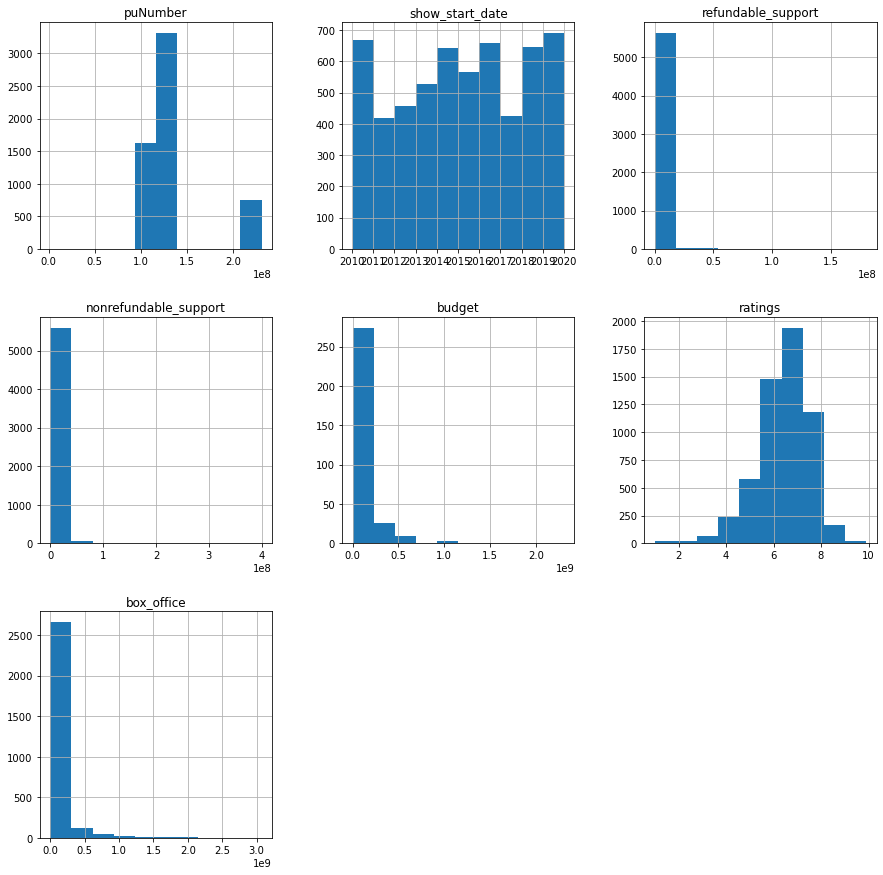

In [49]:
df.hist(figsize=(15, 15))
None

**Нормальное распределение** имеют столбцы:
1. Рэйтинга
**Распределение Пуассона** имеют столбцы
1. box_office
2. budget
3. nonrefundable_support
4. refundable_support

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

Проработаем бюджет

In [50]:
df.budget.value_counts()

0.00              16
38,000,000.00      6
50,000,000.00      4
80,000,000.00      4
40,000,000.00      3
                  ..
14,462,464.00      1
215,860,000.00     1
70,000,000.00      1
91,000,000.00      1
206,982,031.00     1
Name: budget, Length: 276, dtype: int64

In [51]:
ration = df.budget / (df.refundable_support + df.nonrefundable_support)
ration.loc[(ration.isna() == False) & (ration != float('inf'))]

850    3.00
996    1.63
1012   1.45
1203   1.60
1249   2.07
       ... 
5379   1.86
5406   1.56
5504   1.50
5552   1.69
5556   3.76
Length: 314, dtype: float64

In [52]:
ration.min()

0.0

In [53]:
ration.mean()

2.3431078657967372

In [54]:
median = ration.median()
median

1.6632905333333334

In [55]:
ration.std(ddof=0)

2.081538839451254

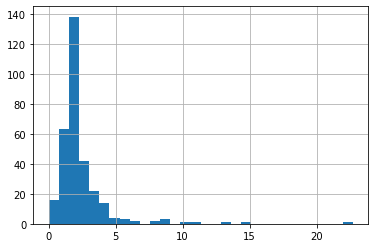

In [56]:
ration.hist(bins=30)
None

In [57]:
df.loc[df.budget == 0, 'budget'] = (
    df.loc[df.budget == 0, 'refundable_support'] + df.loc[df.budget == 0, 'nonrefundable_support']
)

<div class="alert alert-info">

**Комментарий студента**

1. ration - отношение бюджета к сумме государственной поддержки
2. ration имеет **нормальное** распределение
3. среднее ration = 2.3
4. медианное ration = 1.7
5. Если бюджен = 0, но у нас есть информация о государственном финансировании, заполним бюджет суммой гос поддержки
6. Стандартное отклонение 1.2

Разница на порядок по моему мнению является ошибкой при заполнении данных, (количество чисел после запятой)
По графику видно нормальное распределение в данных

<div class="alert alert-info">

**Комментарий студента**

1. Когда rarion > 10, это выбросы, потому что стандартное отклонение равно 1.2 в случае нормальноего распределения в данных выбрасами считается все что не входит в интервал +-3*std (стандартного отклонения)
2. Так же стоит заметить что такие большие значению бюджета могут быть связаны с тем, что бюджеты вносились в ручную, и не было контроля за количеством цифр после запятой.

<div class="alert alert-info">

**Комментарий студента**

Я убрал df_with_NaN = df.copy(), будем рабоать с исходным DataFrame, так же хочу заметить что пропусков в данных в бюджете ~85% и заполнять такой обьем пропусков не имеет смысла

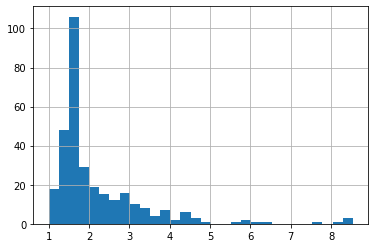

In [58]:
df.loc[ration > 9, 'budget'] = df.budget / 10
ration = df.budget / (df.refundable_support + df.nonrefundable_support)
ration.hist(bins=30)
None

Посмотрим соотношение бюджета со сборами

In [59]:
_ = df.budget / df.box_office
_.loc[(_.isna() == False) & (_ != float('inf'))]

850    217.36
996      8.82
1012   725.61
1203   172.40
1249     3.44
        ...  
5315    10.07
5379     0.40
5406     3.31
5552   154.05
5556     1.10
Length: 301, dtype: float64

In [60]:
med = (df.budget / df.box_office).median()
med

4.344466896392274

In [61]:
(df.budget / df.box_office).mean()

374.1036922193652

#### Шаг 2.6. Добавьте новые столбцы

- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [62]:
df['year'] = df.show_start_date.dt.year

<div class="alert alert-success">
<h1> Комментарий ревьюера ✅</h1>

👍

</div>

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [63]:
df['main_director'] = df.director.str.split(',', expand=True)[0]
df['main_genre'] = df.genres.str.split(',', expand=True)[0]

In [64]:
df[['main_genre', 'main_director']]

,main_genre,main_director
0,боевик,Кевин Костнер
1,драма,Е.Матвеев
2,драма,В.Абдрашитов
3,мелодрама,В.Меньшов
4,мюзикл,Джон Туртурро
...,...,...
5693,драма,Харольд Цварт
5694,фэнтези,Питер Джексон
5695,комедия,Оливер Барру
5696,мультфильм,Густаво Кова


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

До заполнения пропусков

In [65]:
share = (df.refundable_support + df.nonrefundable_support) / df.budget
share = share.loc[(share != 0) & (share.isna() == False) & (share != float('inf'))]
print('share.mean() = ', share.mean())
print('share.median() = ', share.median())

share.mean() =  0.5480522374847179
share.median() =  0.6140376284219444


Доля государственной поддержки составляет ~55%

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

**Количество фильмов каждый год**

In [66]:
df_pt = df.loc[df.box_office.isna() == False].pivot_table(
    index='year', values='puNumber', aggfunc='count'
)
df_pt

,puNumber
year,
2010,93
2011,97
2012,117
2013,181
2014,249
2015,404
2016,487
2017,332
2018,444


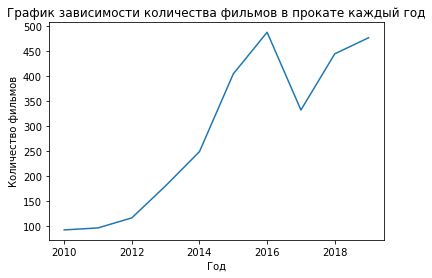

In [67]:
import matplotlib.pyplot as plt

plt.plot(df_pt.index, df_pt)
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.title("График зависимости количества фильмов в прокате каждый год")
None

Мы видим резкое падения количества фильмов в 2017 году

**Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах**

In [68]:
df.loc[df.box_office.isna() == False].shape[0] / df.shape[0]

0.5054405054405054

У половины фильмов нет информации о прокате в кинотеатрах

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [69]:
df_pt = df.loc[df.box_office.isna() == False].pivot_table(
    index='year', values='box_office', aggfunc=['sum', 'mean', 'median']
)
df_pt

,sum,mean,median
,box_office,box_office,box_office
year,,,
2010,"2,132,309.00","22,928.05","1,700.00"
2011,"6,237,377.95","64,302.87","3,085.00"
2012,"11,766,410.65","100,567.61","6,220.00"
2013,"31,231,228.70","172,548.22","3,500.00"
2014,"7,245,572,837.00","29,098,686.09","17,790.00"
2015,"34,511,542,144.14","85,424,609.27","5,397,070.50"
2016,"47,926,746,336.64","98,412,210.14","6,003,344.53"
2017,"45,083,839,197.50","135,794,696.38","10,547,006.50"


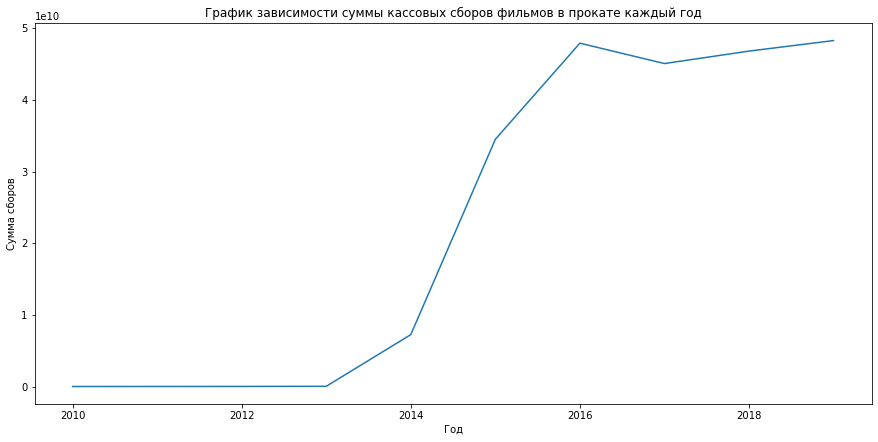

In [70]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(df_pt.index, df_pt[('sum', 'box_office')], label='mean')

ax.set_ylabel('Сумма сборов')
ax.set_xlabel('Год')
ax.set_title("График зависимости суммы кассовых сборов фильмов в прокате каждый год")

None

* Мы видим минимальную выручку в 2010-2012 годах
* Резкий рост выручки в 2014-2016 годах
* Стагнацию выручки в 2018 - 2019 годах
* Максимальная выручка была достигнута в 2019 году

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

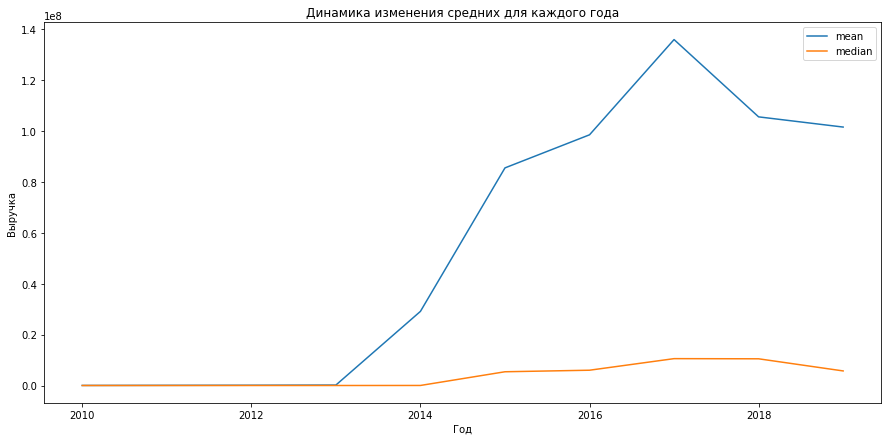

In [71]:
x = df_pt.index
y1 = df_pt[('mean', 'box_office')]
y2 = df_pt[('median', 'box_office')]

fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(x, y1, label='mean')
ax.plot(x, y2, label='median')
ax.set_ylabel('Выручка')
ax.set_xlabel('Год')
ax.set_title("Динамика изменения средних для каждого года")
ax.legend()
None

На графике мы видим резкий рост средней выручки с 2013 по 2017 год, но медиана практически неизменна, это значит что в года роста средней выручки были сверх успешные фильмы

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [72]:
df_pt = df.loc[
    (df.year > 2014) & (df.year < 2020)
    & (df.box_office.isna() == False)
].pivot_table(
    index=['age_restriction', 'year'],
    values=['box_office'],
    aggfunc=['sum', 'mean', 'median']
)
df_pt

sum           mean  \
                                                   box_office     box_office   
age_restriction                        year                                    
«0+» - для любой зрительской аудитории 2015    245,396,035.60  12,269,801.78   
                                       2016    124,838,771.41   7,343,457.14   
                                       2017    228,657,142.00 114,328,571.00   
                                       2018      4,111,901.28   2,055,950.64   
                                       2019     13,779,632.32  13,779,632.32   
«12+» - для детей старше 12 лет        2015 12,007,641,024.51 184,732,938.84   
                                       2016 13,834,090,239.36 189,508,085.47   
                                       2017  7,350,053,008.66 216,178,029.67   
                                       2018 12,471,624,912.64 222,707,587.73   
                                       2019 12,666,138,423.28 183,567,223.53   
«16+» - для детей старше 16 лет        2015 10,360,846,134.54  67,278,221.65   
                                       2016 16,228,725,838.23  91,172,617.07   
                                       2017 17,842,710,130.06 153,816,466.64   
                                       2018 15,508,901,202.42 105,502,729.27   
                                       2019 12,716,212,084.07  79,476,325.53   
«18+» - запрещено для детей            2015  4,319,728,236.08  36,607,866.41   
                                       2016  8,077,116,418.16  51,776,387.30   
                                       2017  8,583,856,730.02  60,878,416.52   
                                       2018  8,739,369,038.58  49,655,505.90   
                                       2019 10,070,739,202.25  57,877,811.51   
«6+» - для детей старше 6 лет          2015  7,577,930,713.41 161,232,568.37   
                                       2016  9,661,975,069.49 153,364,683.64   
                                       2017 11,078,562,186.76 284,065,697.10   
                                       2018 10,097,865,486.06 160,283,579.14   
                                       2019 12,824,204,009.57 178,113,944.58   

                                                    median  
                                                box_office  
age_restriction                        year                 
«0+» - для любой зрительской аудитории 2015   2,949,808.55  
                                       2016     194,527.00  
                                       2017 114,328,571.00  
                                       2018   2,055,950.64  
                                       2019  13,779,632.32  
«12+» - для детей старше 12 лет        2015  22,343,626.00  
                                       2016  12,173,513.01  
                                       2017  19,531,901.00  
                                       2018  12,609,693.06  
                                       2019   4,765,559.50  
«16+» - для детей старше 16 лет        2015   4,676,819.40  
                                       2016   5,686,963.27  
                                       2017  10,150,100.50  
                                       2018  10,097,673.50  
                                       2019   4,265,739.50  
«18+» - запрещено для детей            2015   4,011,143.20  
                                       2016   8,212,300.25  
                                       2017   8,216,845.00  
                                       2018   7,604,029.00  
                                       2019   5,807,315.58  
«6+» - для детей старше 6 лет          2015  20,380,982.20  
                                       2016   4,640,706.79  
                                       2017  51,992,103.00  
                                       2018  21,282,107.64  
                                       2019  25,220,815.07

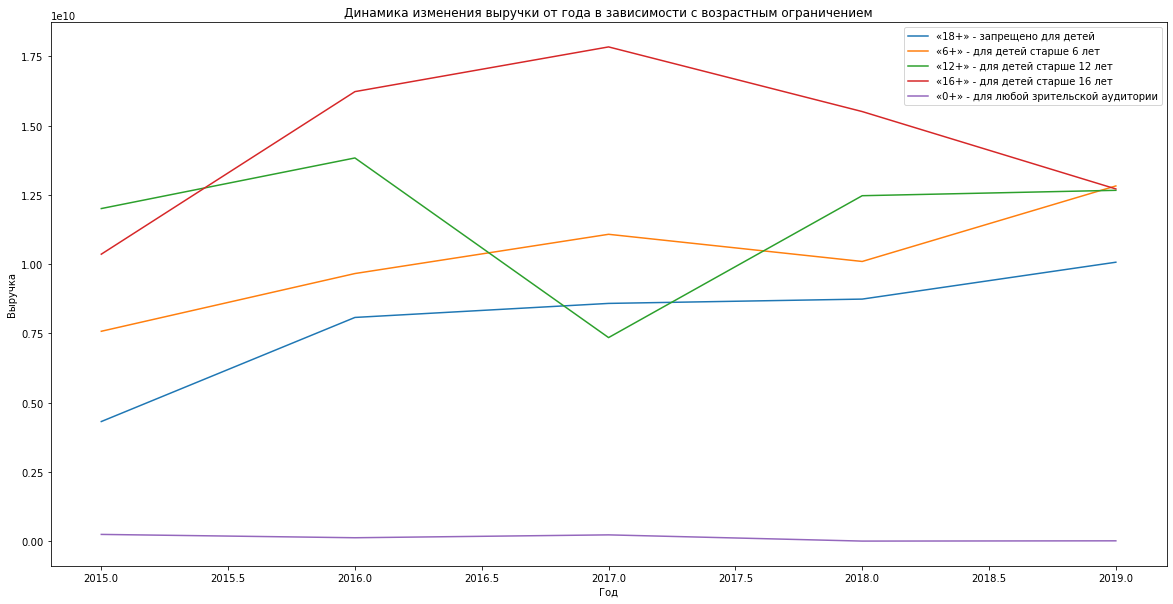

In [73]:
x = range(2015, 2020)
fig, ax = plt.subplots(figsize=(20, 10))

for age in df.age_restriction.unique():
    y = []
    for year in x:
        y.append(df_pt.loc[df_pt.index == (age, year), ('sum', 'box_office')])
    ax.plot(x, y, label=age)

ax.set_ylabel('Выручка')
ax.set_xlabel('Год')
ax.set_title("Динамика изменения выручки от года в зависимости с возрастным ограничением")
ax.legend()
None

In [74]:
df_pt = df.loc[
    (df.year > 2014) & (df.year < 2020)
    & (df.box_office.isna() == False)
].pivot_table(
    index=['age_restriction'],
    values=['box_office'],
    aggfunc=['sum', 'mean', 'median']
)
df_pt

,sum,mean,median
,box_office,box_office,box_office
age_restriction,,,
«0+» - для любой зрительской аудитории,"616,783,482.61","14,685,321.01","2,238,500.23"
«12+» - для детей старше 12 лет,"58,329,547,608.45","196,395,783.19","12,504,334.69"
«16+» - для детей старше 16 лет,"72,657,395,389.32","96,234,960.78","6,754,350.01"
«18+» - запрещено для детей,"39,790,809,625.09","52,014,130.23","6,375,444.60"
«6+» - для детей старше 6 лет,"51,240,537,465.29","180,424,427.69","18,953,181.29"


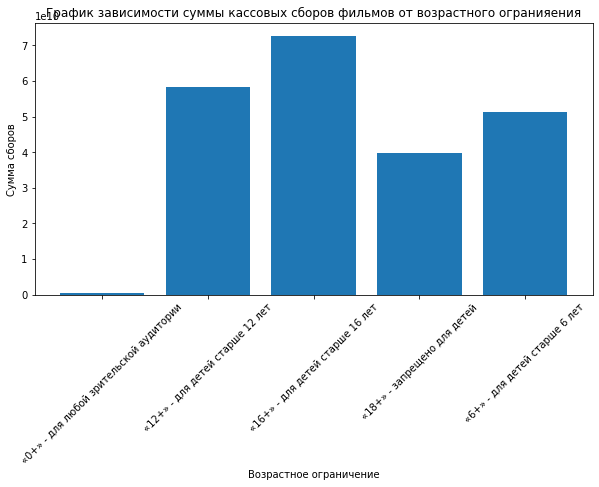

In [75]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(df_pt.index, df_pt[('sum', 'box_office')], label='mean')
plt.xticks(rotation=45)
ax.set_ylabel('Сумма сборов')
ax.set_xlabel('Возрастное ограничение')
ax.set_title("График зависимости суммы кассовых сборов фильмов от возрастного огранияения")

None

Больше всего в сумме выручка была у фильмов с возрастным ограничением 16+

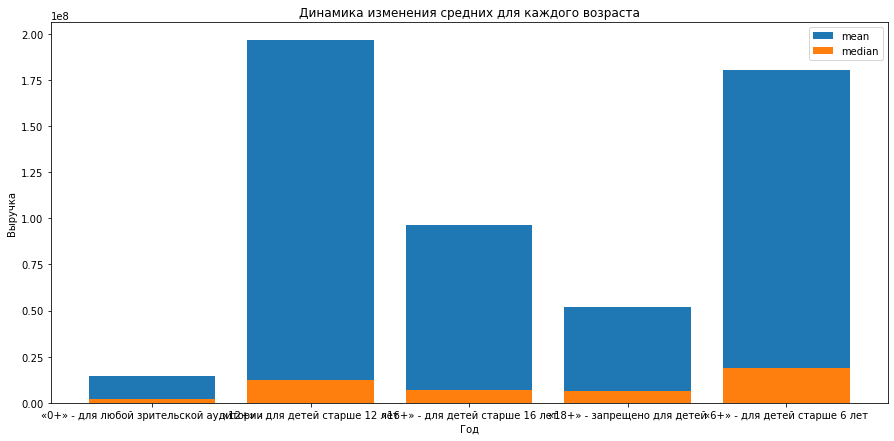

In [76]:
x = df_pt.index
y1 = df_pt[('mean', 'box_office')]
y2 = df_pt[('median', 'box_office')]

fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(x, y1, label='mean')
ax.bar(x, y2, label='median')
ax.set_ylabel('Выручка')
ax.set_xlabel('Год')
ax.set_title("Динамика изменения средних для каждого возраста")
ax.legend()
None

Фильмы с возрастным ограничением в 6 и 12 лет имеют наибольшую среднюю выручку

С 2016 по 2018 годы мы видим ~симметрию графика суммы выручки для фильмов с возрастными ограничениями 12+ и 16+, у меня есть предположение, что 14-15 дети подросли и начали смотреть фильмы 16+

Так же мы видим постоянные рост выручки у фильмов 18+

Выручка фильмов 0+ стагнирует, 6+ медленно растет

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Отфильтруем DataFrame, оставим только те фильмы, в которых есть доля гос участия

In [77]:
df_gos = df.loc[
    (df.refundable_support != -1) | (df.nonrefundable_support != -1)
]
df_gos.production_country.value_counts()

Россия                                        299
Россия, Италия                                  2
Россия, Германия                                2
Россия, Франция, Латвия                         1
Россия-Украина                                  1
Россия, Украина, Польша                         1
Россия, Германия, Великобритания                1
Россия, Армения                                 1
Россия-Словакия-Чехия                           1
Россия, Латвия, Чешская Республика              1
Россия, Германия, Казахстан, Польша, Китай      1
Россия, Сербия                                  1
Россия - Грузия                                 1
Россия-Китай                                    1
Name: production_country, dtype: int64

**Создадим столбец, который будет показывать только государственные средства в фильме**

Сгруппируем по году, значения (бюджет, финансирование) 

In [78]:
df_gos['from_gos'] = df.refundable_support + df.nonrefundable_support
df_gos.from_gos = df_gos.from_gos.astype('float')
df_pt = df_gos.pivot_table(index='year', values=['budget', 'from_gos'], aggfunc='sum')
df_pt

,budget,from_gos
year,,
2013,"255,435,390.00","134,347,945.00"
2014,"998,053,034.00","456,002,299.00"
2015,"7,218,986,805.60","3,557,241,459.00"
2016,"7,242,030,461.30","4,153,155,482.00"
2017,"6,858,186,481.30","3,133,971,662.00"
2018,"6,666,185,636.00","3,193,000,000.00"
2019,"11,701,464,666.50","4,764,000,000.00"


Динамика изменения финансовых показателей фильмов по годам
1. **budget** - общий бюджет фильма
2. **from_gos** - объём государственной поддержки

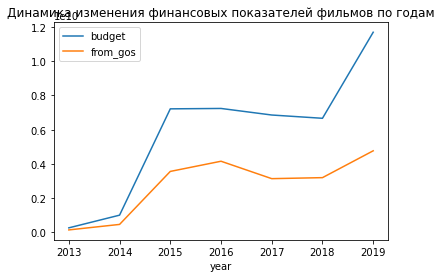

In [79]:
df_pt.plot(title='Динамика изменения финансовых показателей фильмов по годам')
None

<div class="alert alert-info">

**Комментарий студента**
    
**Мы видим рост бюджета по годам** 
1. резкие скачки наблюдаются в 2014-2015 и 2018-2019 годах, 
2. стагнация в 2015-2018 годах
    
**Мы видим рост объёма финансирования по годам**
1. резкие скачки наблюдаются в 2014-2015 и 2018-2019 годах, 
2. стагнация в 2017-2018 годах
3. уменьшение финансирования наблюдается в 2016-2017 годах

In [80]:
df_pt = df_gos.pivot_table(index='year', values=['budget', 'from_gos', 'box_office'], aggfunc=['mean', 'median'])
df_pt

mean                                     median                 \
         box_office         budget      from_gos    box_office         budget   
year                                                                            
2013  10,161,192.55 127,717,695.00 67,173,972.50 10,161,192.55 127,717,695.00   
2014  66,376,713.25  71,289,502.43 32,571,592.79  5,504,517.85  61,036,441.50   
2015  70,415,503.34  86,975,744.65 42,858,330.83  9,589,318.50  56,909,520.00   
2016 108,384,519.59 127,053,165.99 72,862,376.88 20,861,320.67  69,428,728.00   
2017 293,473,075.05 175,850,935.42 80,358,247.74 55,108,014.76  78,096,315.00   
2018 160,109,183.76 125,777,087.47 60,245,283.02 30,325,879.15  87,649,127.00   
2019 147,436,687.14 177,294,919.19 72,181,818.18 32,721,103.43  78,388,683.00   

                    
          from_gos  
year                
2013 67,173,972.50  
2014 27,500,000.00  
2015 30,000,000.00  
2016 35,000,000.00  
2017 40,000,000.00  
2018 40,000,000.00  
2019 40,000,000.00

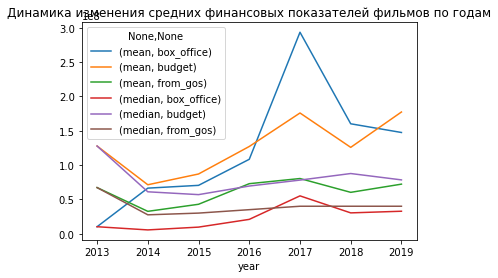

In [81]:
df_pt.plot(title='Динамика изменения средних финансовых показателей фильмов по годам')
None

<div class="alert alert-info">

**Комментарий студента**
  
    
**Бюджет** - мы видим рост средних бюджета по годам
1. Резкое падение с 2013 по 2014 года
2. Падение среднего в 2017 - 2018 году
3. Резкий рост среднего с 2014 по 2017
4. Плавный рост медианы с 2015 по 2018
5. Падение среднего (арифметического) в 2017 году у бюджета и государственных инвестиций
    
    
**Объём финансирования** - мы видим рост объёма финансирования по годам
1. Резкое падение с 2013 по 2014 года
2. Стагнация (очень медленный рост) медианы в 2014-2019 годах
3. Падение среднего в 2017 году
4. Падение среднего (арифметического) в 2017 году у бюджета и государственных инвестиций

    
**Кассовые сборы фильма**
1. Медианное значение кассовых сборов, (далее выручки) имеет незначительный рост по годам, более похожий на стагнацию, учитывая инфляцию
2. Среднее арифметическое же имеет рост с 2013 по 2016 и резкий рост с 2016 по 2017 года
3. Так же среднее имеет резкое падение с 2017 по 2018 год и плавное падаение с 2018 по 2019 год

**Общий комментарий по трем финосвым показателям**
    
Резкие скачки среднего могут быть связаны с "Может быть один фильм собрал в 100 раз больше чем господдержка и вытянул метрику для всех фильмов." как ты говорил, полностью согласен, это подтверждается плавной медианой, проверим распределение данных

Построим гистограмму за 2016 и 2017 года

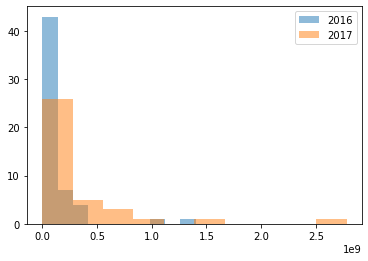

In [82]:
import numpy as np
from matplotlib import pyplot

x = df_gos.loc[df_gos.year == 2016, 'box_office']
y = df_gos.loc[df_gos.year == 2017, 'box_office']



pyplot.hist(x, alpha=0.5, label='2016')
pyplot.hist(y, alpha=0.5, label='2017')
pyplot.legend(loc='upper right')
pyplot.show()

Мы видим распределение Пуассона, в 2016 году больше "дешевых" фильмов, а в 2017 году мы выдим "дорогие" фильмы

**Посчитаем ROS - рентабельность (гос инвестиций) для фильмов с гос. поддержкой**

In [83]:
df_gos['ros'] = df_gos.box_office / (df_gos.refundable_support + df_gos.nonrefundable_support)
df_gos.ros.mean()

1.920654622733508

In [84]:
df_gos.ros.median()

0.465428924

In [85]:
df_gos.ros.std(ddof=0)

4.324213055314092

ROS.mean() = 92%
ROS.median() = -54%
ROS.std() = 4.34 

Сгруппируем фильмы по годам, и посмотрим средний (медианный) ROS для каждого года

In [86]:
df_pt = df_gos.pivot_table(index='year', values='ros', aggfunc=['mean', 'median'])
df_pt

,mean,median
,ros,ros
year,,
2013,0.10,0.10
2014,1.72,0.16
2015,1.40,0.23
2016,1.37,0.54
2017,3.22,1.38
2018,2.18,0.86
2019,2.24,0.55


Визуализируем динамику изменения, среднего (медианного) ROS по годам

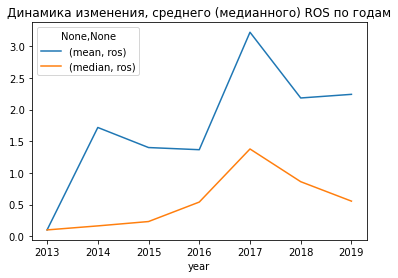

In [87]:
df_pt.plot(title='Динамика изменения, среднего (медианного) ROS по годам')
None

Мы видим тенденцию роста рентабельности кинофильмов, с 2013 по 2017 года, максимум был достугнут в 2017, затем наблюдается спад

<div class="alert alert-info">

**Комментарий студента**
Если смотреть на медиану, то только в 2017 году можно говорить об успешности фильмов с господдержкой. В остальные годы фильмы в основном не окупаются.

Согласен, так же всоминая провалы в выручке после 2017 года, могу предположить что в 2017 году вышел всерхуспешний фильм, который и покрыл все остальные убыточные

In [88]:
df_gos.loc[df.year == 2017].sort_values(by='box_office', ascending=False).head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,country,year,main_director,main_genre,from_gos,ros
3775,Движение вверх,111011817,2017-12-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0,...,Фонд кино,7.50,"спорт,драма","2,779,686,144.00",Pоссия,2017,А.Мегердичев,спорт,"400,000,000.00",6.95
3646,Последний богатырь,111007017,2017-10-19 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"" по заказу ООО ""Уолт Ди...",Россия,Д.Дьяченко,"Э.Илоян, Д.Жалинский, М.Озкан, А.Троцюк, В.Шляппо",«12+» - для детей старше 12 лет,50000000,...,Фонд кино,6.80,"комедия,фэнтези,приключения","1,655,037,688.00",Pоссия,2017,Д.Дьяченко,комедия,"100,000,000.00",16.55
3766,Ёлки Новые,111011617,2017-12-21 12:00:00+00:00,Художественный,"ООО ""ТаББаК""",Россия,"Д.Киселев, А.Першин (Ж.Крыжовников), А.Карпило...","Т.Бекмамбетов, Г.Стрижевская",«6+» - для детей старше 6 лет,50000000,...,Фонд кино,5.80,"комедия,мелодрама","855,451,052.00",Pоссия,2017,Д.Киселев,комедия,"100,000,000.00",8.55
3780,Три богатыря и принцесса Египта,114003317,2017-12-21 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,К.Феоктистов,"С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,50000000,...,Фонд кино,5.50,"мультфильм,приключения,семейный","759,226,773.00",Pоссия,2017,К.Феоктистов,мультфильм,"50,000,000.00",15.18
3643,Салют-7,111006917,2017-10-01 12:00:00+00:00,Художественный,"ООО ""Лемон Филмз Студио""",Россия,К.Шипенко,"С.Сельянов, Б.Бакурадзе, А.Златопольский",«12+» - для детей старше 12 лет,0,...,Фонд кино,7.40,"драма,приключения,триллер","752,679,777.00",Pоссия,2017,К.Шипенко,драма,"225,000,000.00",3.35


<div class="alert alert-info">

**Комментарий студента**
Движение вверх, последний богатырь - сверх успешные фильмы, которые принесли рекордную выручку, именно они вытянули средние показатели

**Сгруппируем фильмы по годам, и посмотрим средний (медианный) рэйтинг для каждого года**

In [89]:
df_pt = df_gos.pivot_table(index='year', values='ratings', aggfunc=['mean', 'median'])
df_pt

,mean,median
,ratings,ratings
year,,
2013,6.70,6.70
2014,5.94,6.35
2015,6.14,6.20
2016,5.68,5.80
2017,6.00,6.20
2018,6.00,6.20
2019,6.19,6.20


Визуализируем динамику изменеия, среднего (медианного) рейтинга по годам

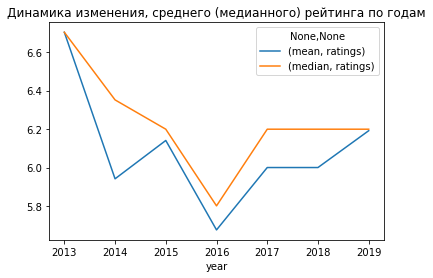

In [90]:
df_pt.plot(title='Динамика изменения, среднего (медианного) рейтинга по годам')
None

На графике финансированя фильмов мы видим, повышение сумму инвестиций в кино с 2014 по 2016 года, а на графике динамики измениея рэйтинга по годам мы видим критическое снижение среднего (медианного) рэйтинга фильмов в 2016 году

**Исследуем зависимость рэйтинга фильма, от полученных инвестиций**

Диаграмма рассеивания

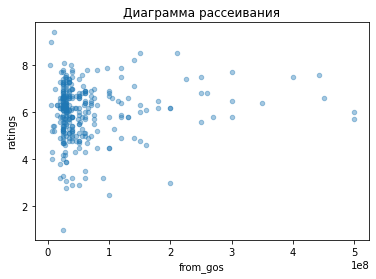

In [91]:
df_gos.plot(x='from_gos', y='ratings', kind='scatter', alpha=0.4, title='Диаграмма рассеивания')
None

Коэффициент корреляции

In [92]:
df_gos.ratings.corr(df_gos.from_gos)

0.10068513669703806

Можем сделать вывод, что рэйтинг фильма не зависит от государственного финансирования, что странно.

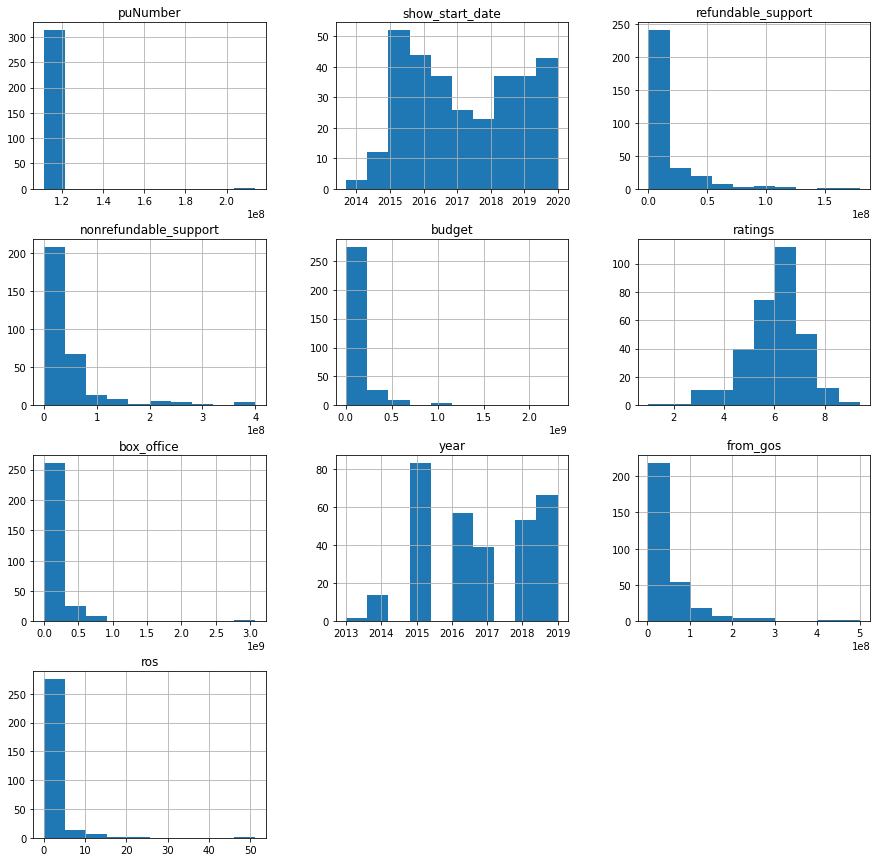

In [93]:
df_gos.hist(figsize=(15, 15))
None

**Нормальное распределение**
1. ratings

**Воспрещение Пуассона**
1. refundable_support
2. nonrefundable_support
3. budget
4. from_gos
5. ros

На гистограмме столбца show_start_date — дата премьеры фильма, мы видим резкое увеличение числа фильмов с 2014 по 2016 года, что соответствует увеличению финансирования кино индустрии в эти года, но как мы помним роста в среднем рейтинге в эти года не было, а наоборот наблюдался спад, это значит что наши ребятя решили брать количеством, а не качеством.

**Исследуем зависимости в данных**

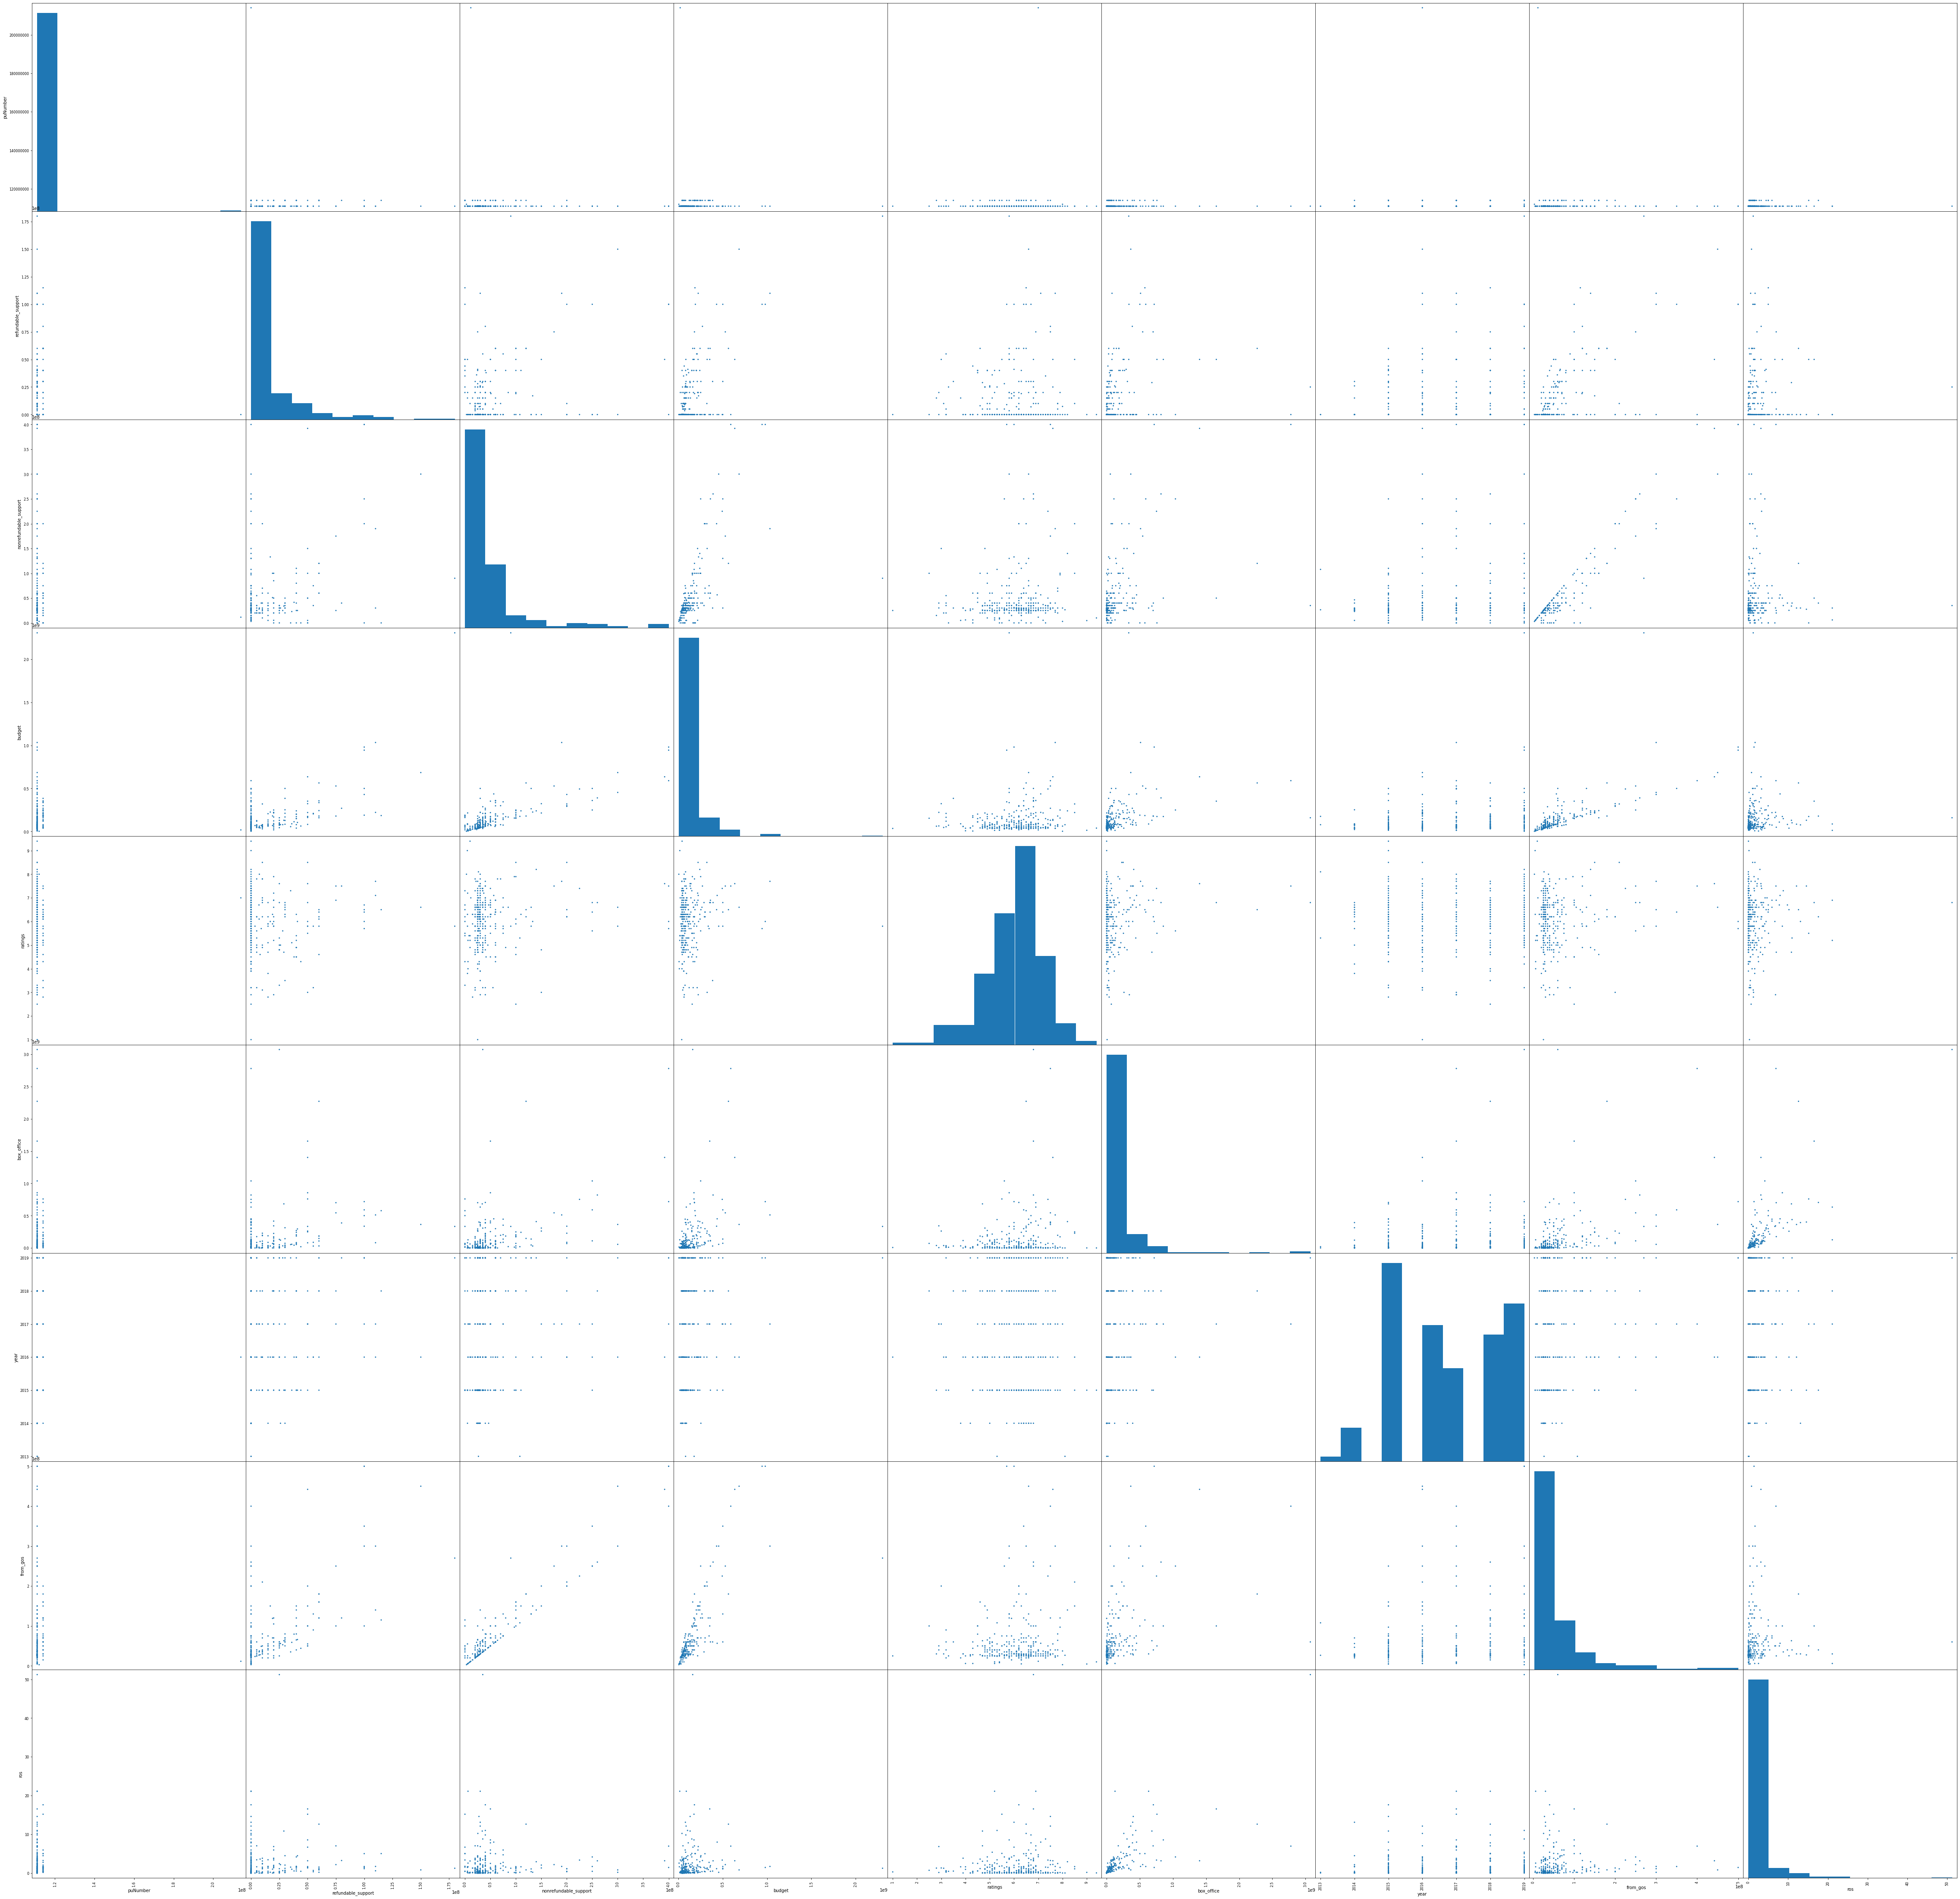

In [94]:
pd.plotting.scatter_matrix(df_gos, figsize=(80, 80), alpha=1)
None

Матрица корреляции

In [95]:
corr_matrix = df_gos.corr()
corr_matrix

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,year,from_gos,ros
puNumber,1.00,0.01,-0.03,-0.02,0.04,0.06,-0.02,-0.02,0.07
refundable_support,0.01,1.00,0.36,0.67,-0.00,0.31,0.09,0.64,0.11
nonrefundable_support,-0.03,0.36,1.00,0.64,0.12,0.47,0.12,0.95,0.02
budget,-0.02,0.67,0.64,1.00,0.09,0.39,0.16,0.76,0.10
ratings,0.04,-0.00,0.12,0.09,1.00,0.14,0.03,0.10,0.06
box_office,0.06,0.31,0.47,0.39,0.14,1.00,0.11,0.50,0.73
year,-0.02,0.09,0.12,0.16,0.03,0.11,1.00,0.13,0.09
from_gos,-0.02,0.64,0.95,0.76,0.10,0.50,0.13,1.00,0.05
ros,0.07,0.11,0.02,0.10,0.06,0.73,0.09,0.05,1.00


Тепловая карта

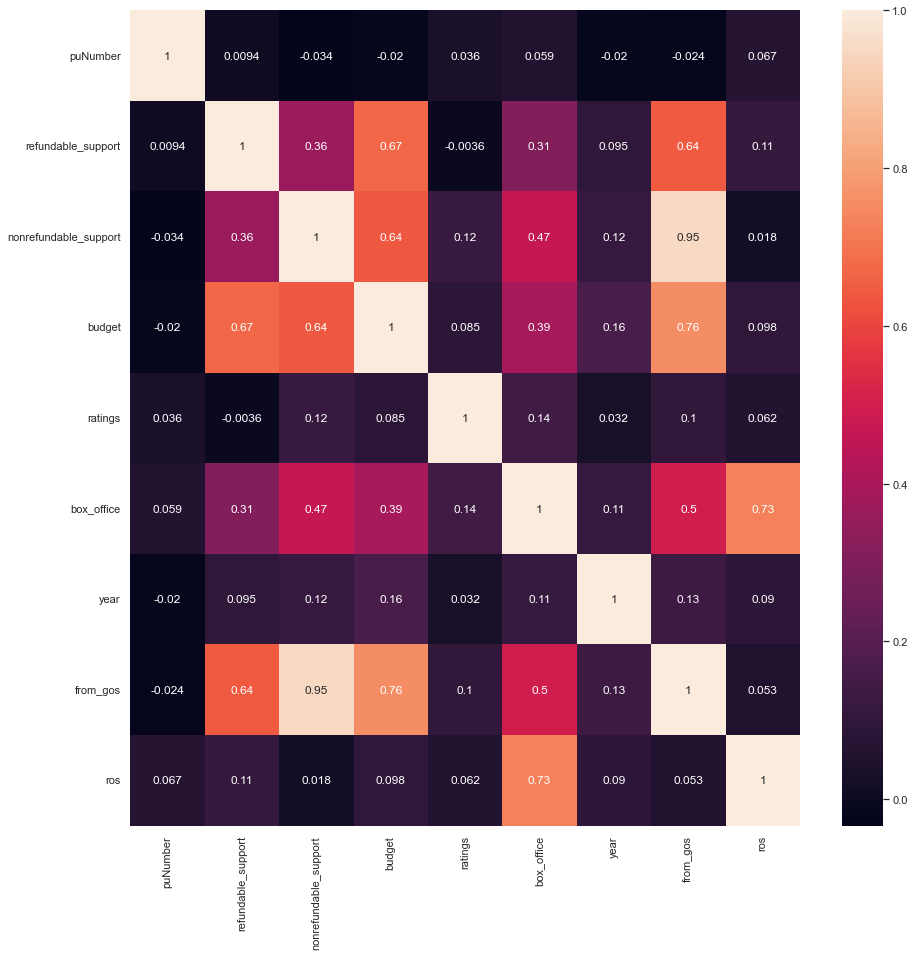

In [96]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15, 15)})
sns.heatmap(corr_matrix, annot=True)
None

Наблюдается зависимость в столбцах:
1. budget, refundable_support = 0.66
2. budget, nonrefundable_support = 0.62
3. from_gos, refundable_support = 0.64
4. from_gos, nonrefundable_support = 0.95
5. ros, box_office = 0.73
6. box_office, from_gos = 0.5
7. budget, from_gos = 0.74

Можем сделать вывод, что
1. бюджет более чем на половину зависит от государственных инвестиций
2. Рентабельность зависит от выручки (ROS введенная мной метрика)
3. Выручка зависит от объема гос инвестиций

### Шаг 5. Напишите общий вывод
#### 5.1. Общая информация о Датасетах
**Описание столбцов**
title — название фильма;
puNumber — номер прокатного удостоверения;
show_start_date — дата премьеры фильма;
type — тип фильма;
film_studio — студия-производитель;
production_country — страна-производитель;
director — режиссёр;
producer — продюсер;
age_restriction — возрастная категория;
refundable_support — объём возвратных средств государственной поддержки;
nonrefundable_support — объём невозвратных средств государственной поддержки;
financing_source — источник государственного финансирования;
budget — общий бюджет фильма;
ratings — рейтинг фильма на КиноПоиске;
genres — жанр фильма.
box_office — сборы в рублях.

**Есть пропуски**
director
producer
refundable_support
nonrefundable_support
budget
financing_source
ratings
genres

#### 5.2. Предобработка данных
1. Нормальное распределение имеет столбец рэйтинга
2. Колонки title, film_studio, director, producer оставим типа object, тк для эффективности перехода к категориальному типу данных, необходимо менее 50% уникальных значений
3. Заполним пропуски (государственное финансирование) у фильмов (-1).
4. Удалим фильмы без рэйтинга
5. PS, как оказалось потом, кинофильмы без бюджета и информации о кассовых сборах в аналитике участвовать не будут
НО я заморочился и сегментировано заполнил пропуски
6. Явные дубликаты не обнаружены
7. Не явные дубликаты устранены

#### 5.3. Исследовательский анализ данных
1. Доля государственной поддержки составляет ~50%
2. Мы видим резкое падения количества фильмов в 20ёё11 и в 2017 годах
3. У половины фильмов нет информации о прокате в кинотеатрах, не учитываем их в аналитики
4. Динамика выручки по годам
* Мы видим минимальную выручку в 2010-2012 годах
* Резкий рост выручки в 2014-2016 годах
* Стагнацию выручки в 2018 - 2019 годах
* Максимальная выручка была достигнута в 2019 году
5. Динамика средней (медианной) выручки по годам - На графике мы видим резкий рост средней выручки с 2013 по 2017 год, но медиана практически неизменна, это значит что в года роста средней выручки были сверх успешные фильмы
6. Больше всего в сумме выручка была у фильмов с возрастным ограничением 16+
7. Фильмы с возрастным ограничением в 6 и 12 лет имеют наибольшую среднюю выручку
8. С 2016 по 2018 годы мы видим ~симметрию графика суммы выручки для фильмов с возрастными ограничениями 12+ и 16+, у меня есть предположение, что 14-15 дети подросли и начали смотреть фильмы 16+
9. Так же мы видим постоянные рост выручки у фильмов 18+
10. Выручка фильмов 0+ стагнирует, 6+ медленно растет


#### 5.4. Исследуйте фильмы, которые получили государственную поддержку
1. Сумма Гос поддержки фильмов увеличивается с каждым годом
2. ROS = 92%, фильмы окупаются практически в 2 раза
3. Мы видим тенденцию роста рентабельности кинофильмов, с 2013 по 2017 года, максимум был достугнут в 2017, затем наблюдается спад
4. На графике финансированя фильмов мы видим, повышение сумму инвестиций в кино с 2014 по 2016 года, а на графике динамики измениея рэйтинга по годам мы видим критическое снижение среднего (медианного) рэйтинга фильмов в 2016 году
5. Можем сделать вывод, что рэйтинг фильма не зависит от государственного финансирования, что странно.
6. На гистограмме столбца show_start_date — дата премьеры фильма, мы видим резкое увеличение числа фильмов с 2014 по 2016 года, что соответствует увеличению финансирования кино индустрии в эти года, но как мы помним роста в среднем рейтинге в эти года не было, а наоборот наблюдался спад, это значит что наши ребятя решили брать количеством, а не качеством.
7. бюджет более чем на половину зависит от государственных инвестиций
8. Рентабельность зависит от выручки (ROS введенная мной метрика)
9. Выручка зависит от объема гос инвестиций